Análisis Exploratorio de Datos (EDA) Avanzado
1. Estructura de los Datos
Registros: 142,164 filas × 15 columnas.

Variables clave:

Target: Muertes_por_causa (muertes respiratorias y otras causas).

Predictores:

Calidad del aire: VALOR_ICA (índice numérico), CATEGORIA_ICA (categoría).

Geográficos: Provincias, LATITUD_G, LONGITUD_G, ALTITUD.

Políticos: Partido (PP, PSOE, etc.).

Demográficos: Sexo, Poblacion.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/df_full_completo_filtrado.csv", sep=';')
df.head()

,Causa de muerte,Sexo,Provincias,mes,year,Muertes_por_causa,codigo_provincia,LATITUD_G,LONGITUD_G,ALTITUD,TIPO_AREA,VALOR_ICA,CATEGORIA_ICA,Partido,Poblacion
0,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,1,2022,209.072686,2,38.9808,-1.8452,691.0,SUBURBANA,22.778847,Buena,PP,199208.0
1,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,2,2022,150.678320,2,38.9808,-1.8452,691.0,SUBURBANA,20.110090,Razonablemente buena,PP,11435.0
2,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,3,2022,173.097586,2,38.9808,-1.8452,691.0,SUBURBANA,26.769706,Buena,PP,10762.0
3,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,4,2022,179.875503,2,38.9808,-1.8452,691.0,SUBURBANA,8.073927,Buena,PP,10089.0
4,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,5,2022,179.354125,2,38.9808,-1.8452,691.0,SUBURBANA,13.674748,Buena,PP,9415.0


In [4]:
df.describe()

,mes,year,Muertes_por_causa,codigo_provincia,LATITUD_G,LONGITUD_G,ALTITUD,VALOR_ICA,Poblacion
count,142164.00000,142164.000000,142164.000000,142164.000000,142164.000000,142164.000000,142164.000000,142164.000000,1.421640e+05
mean,6.34667,2017.340593,129.525323,27.687263,40.521154,-3.258401,464.106563,15.904697,1.031810e+05
std,3.43351,2.777251,208.258148,14.363216,2.777739,3.718046,300.827704,6.856338,3.367039e+05
min,1.00000,2013.000000,0.000000,2.000000,28.337737,-16.709137,1.000000,2.171034,1.932000e+03
25%,3.00000,2015.000000,9.608028,17.000000,39.581074,-4.735354,157.363636,11.138660,9.743000e+03
50%,6.00000,2017.000000,54.462992,28.000000,41.374305,-3.194767,421.818182,14.539583,1.802250e+04
75%,9.00000,2020.000000,156.703645,39.000000,42.158433,-0.863265,691.000000,19.323746,4.083400e+04
max,12.00000,2022.000000,6345.428880,51.000000,43.330504,2.820357,1049.000000,53.608333,3.699640e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142164 entries, 0 to 142163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Causa de muerte    142164 non-null  object 
 1   Sexo               142164 non-null  object 
 2   Provincias         142164 non-null  object 
 3   mes                142164 non-null  int64  
 4   year               142164 non-null  int64  
 5   Muertes_por_causa  142164 non-null  float64
 6   codigo_provincia   142164 non-null  int64  
 7   LATITUD_G          142164 non-null  float64
 8   LONGITUD_G         142164 non-null  float64
 9   ALTITUD            142164 non-null  float64
 10  TIPO_AREA          142164 non-null  object 
 11  VALOR_ICA          142164 non-null  float64
 12  CATEGORIA_ICA      142164 non-null  object 
 13  Partido            142164 non-null  object 
 14  Poblacion          142164 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 16

In [6]:
# Verifica si hay filas con esa categoría
print(df[df['Causa de muerte'] == '001-102  I-XXII.Todas las causas'].shape[0])

# Si hay filas, puedes eliminarlas (opcional)
df = df[df['Causa de muerte'] != '001-102  I-XXII.Todas las causas']

# Asegúrate que sea categoría para usar remove_categories
df['Causa de muerte'] = df['Causa de muerte'].astype('category')

# Elimina la categoría de las categorías definidas
if '001-102  I-XXII.Todas las causas' in df['Causa de muerte'].cat.categories:
    df['Causa de muerte'] = df['Causa de muerte'].cat.remove_categories(['001-102  I-XXII.Todas las causas'])

# Verifica categorías después de eliminar
print(df['Causa de muerte'].cat.categories)



7898
Index(['001-008  I.Enfermedades infecciosas y parasitarias',
       '009-041  II.Tumores',
       '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
       '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
       '046-049  V.Trastornos mentales y del comportamiento',
       '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
       '053-061 IX.Enfermedades del sistema circulatorio',
       '062-067  X.Enfermedades del sistema respiratorio',
       '068-072  XI.Enfermedades del sistema digestivo',
       '073  XII.Enfermedades de la piel y del tejido subcutáneo',
       '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
       '077-080  XIV.Enfermedades del sistema genitourinario',
       '081  XV.Embarazo, parto y puerperio',
       '082  XVI.Afecciones originadas en el periodo perinatal',
       '083-085  XVII.Mal

**Distribución de las variables predictoras**

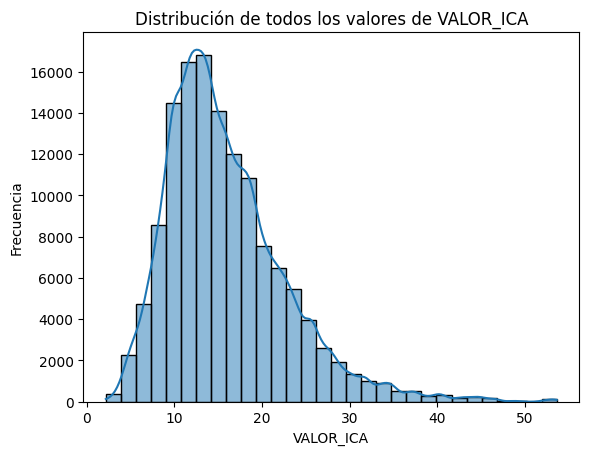

In [7]:
# Graficar todos los valores de VALOR_ICA
sns.histplot(df['VALOR_ICA'], kde=True, bins=30)
plt.title('Distribución de todos los valores de VALOR_ICA')
plt.xlabel('VALOR_ICA')
plt.ylabel('Frecuencia')
plt.show()


Si bien la mayor parte de los valores ICA están torno a 5-25, no se puede descartar las colas con ICA<30, porque aunque estadísticamente el numero no sea muy relevante, probablemtne las consecuentcias si son importantes, especialmentne cuando se trata de muertes. Por eso se decide no eliminar outliers. La mortalidad es un fenómeno complejo y no necesariamente lineal con respecto al ICA. Por eso vamos a examinar con más detenimiento que pasa a valores de ICA<30.

In [8]:
df_mortalidad = df.groupby(['Provincias', 'year', 'mes'])['Muertes_por_causa'].sum().reset_index()
df_altos = df[df['VALOR_ICA'] > 30]
resumen = df_altos.groupby(['Provincias', 'year', 'mes']).size().reset_index(name='eventos_alto_ICA')
df_mortalidad['year'] = df_mortalidad['year'].astype(int)
df_mortalidad['mes'] = df_mortalidad['mes'].astype(int)
resumen['year'] = resumen['year'].astype(int)
resumen['mes'] = resumen['mes'].astype(int)


In [9]:
# asegura que los tipos sean iguales
df_mortalidad['year'] = df_mortalidad['year'].astype(int)
df_mortalidad['mes'] = df_mortalidad['mes'].astype(int)

resumen['year'] = resumen['year'].astype(int)
resumen['mes'] = resumen['mes'].astype(int)


In [10]:
df_merged = pd.merge(df_mortalidad, resumen, on=['Provincias', 'year', 'mes'], how='left')
df_merged['eventos_alto_ICA'] = df_merged['eventos_alto_ICA'].fillna(0)


In [11]:
print(df_merged[df_merged['eventos_alto_ICA'] > 0].head())


       Provincias  year  mes  Muertes_por_causa  eventos_alto_ICA
11    02 Albacete  2013   12        3340.000000              34.0
33    02 Albacete  2015   12        3280.000000              34.0
458  08 Barcelona  2013    1       10164.633053              34.0
459  08 Barcelona  2013    2        9403.143108              34.0
460  08 Barcelona  2013    3        9348.260950              34.0


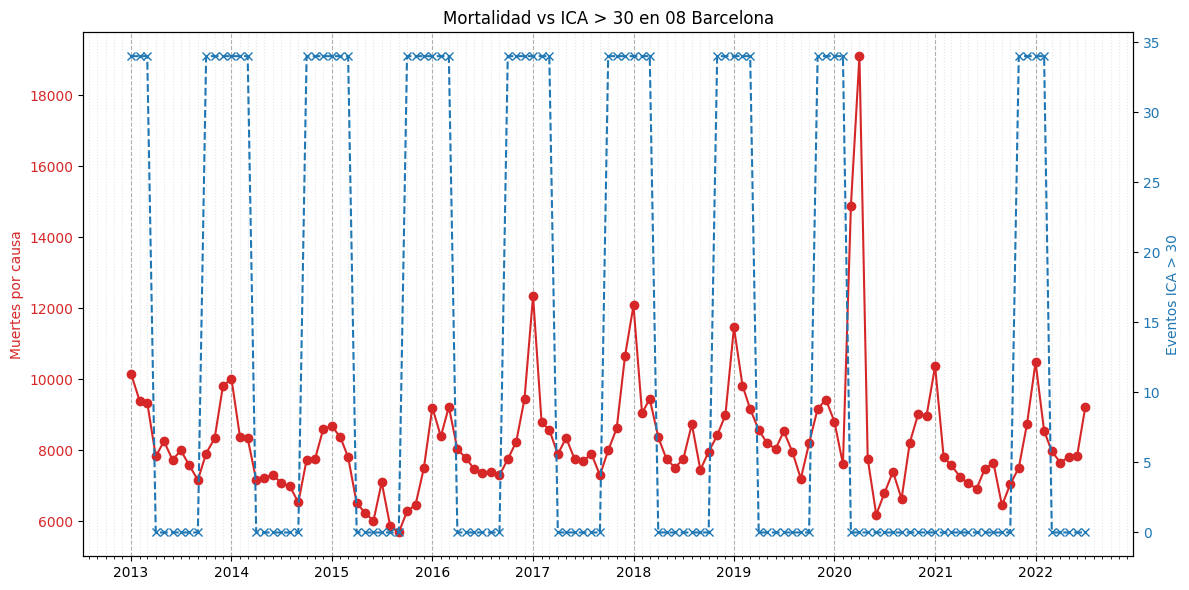

In [12]:
# graficamos una provincia con varios casos de ICA > 30
provincia = '08 Barcelona'
df_plot = df_merged[df_merged['Provincias'] == provincia].sort_values(['year', 'mes'])

# Crear columna fecha como datetime (día 1 de cada mes)
df_plot['fecha'] = pd.to_datetime(df_plot['year'].astype(str) + '-' + df_plot['mes'].astype(str).str.zfill(2) + '-01')

fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Y izquierdo: muertes
color = 'tab:red'
ax1.set_ylabel('Muertes por causa', color=color)
ax1.plot(df_plot['fecha'], df_plot['Muertes_por_causa'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Eje Y derecho: ICA
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Eventos ICA > 30', color=color)
ax2.plot(df_plot['fecha'], df_plot['eventos_alto_ICA'], color=color, linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Mejora del eje X
ax1.xaxis.set_major_locator(mdates.YearLocator())            # Etiqueta principal: año
ax1.xaxis.set_minor_locator(mdates.MonthLocator())           # Rayas menores: cada mes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))    # Formato año
ax1.grid(True, which='major', axis='x', linestyle='--')
ax1.grid(True, which='minor', axis='x', linestyle=':', alpha=0.3)

plt.title(f'Mortalidad vs ICA > 30 en {provincia}')
fig.tight_layout()
plt.show()


En esta grafica, se representa en número de eventos en los que el valor ICA ha sido > 30 frente a la mortalidad; se aprecia una aparente coindicencia en meses continuados con ICA>30 y aumento de mortalidad.

Se aprecian outliers probablemente por el efecto del covid.
 En la columna Muertes_por_causa: Media: 129.52, Máx: 6,345.43 (distribución altamente sesgada)

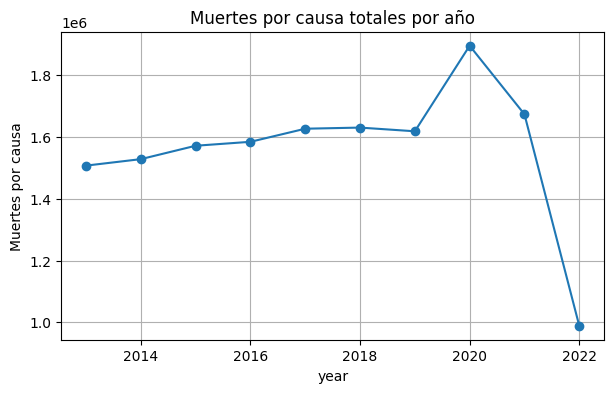

In [13]:
# Agrupa por año y suma las muertes por causa para ver la evolucion de la mortalidad a nivel nacional
df_totales = df.groupby('year')['Muertes_por_causa'].sum().reset_index()

# Grafica
plt.figure(figsize=(7,4))
plt.plot(df_totales['year'], df_totales['Muertes_por_causa'], marker='o')
plt.title('Muertes por causa totales por año')
plt.xlabel('year')
plt.ylabel('Muertes por causa')
plt.grid(True)
plt.show()

Se aprecia un incremento muy grande en la mortalidad, causada por el COVID, a partir del 2019, por lo que se analizará por separado para evaluar la influencia al final del notebook.

In [14]:
df[df['Poblacion']==0]

,Causa de muerte,Sexo,Provincias,mes,year,Muertes_por_causa,codigo_provincia,LATITUD_G,LONGITUD_G,ALTITUD,TIPO_AREA,VALOR_ICA,CATEGORIA_ICA,Partido,Poblacion


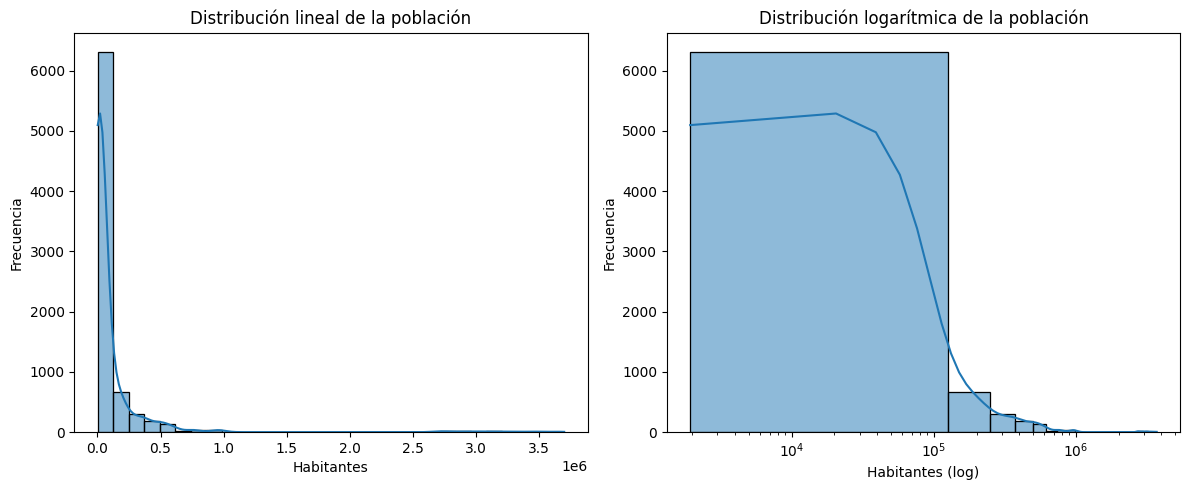

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Si hay repetición por mes o día, tomamos una fila por provincia
df_unique_pob = df[['Provincias', 'Poblacion']].drop_duplicates()

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma normal
sns.histplot(df_unique_pob['Poblacion'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribución lineal de la población')
axes[0].set_xlabel('Habitantes')
axes[0].set_ylabel('Frecuencia')

# Histograma con escala logarítmica
sns.histplot(df_unique_pob['Poblacion'], kde=True, bins=30, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Distribución logarítmica de la población')
axes[1].set_xlabel('Habitantes (log)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Distribución de la población.

La población en España no está distribuida uniformemente entre provincias. Entre otras razones por concentración urbana (Provincias como Madrid y Barcelona concentran millones de personas9 y despoblación rural. Muchas provincias, especialmente en el interior, tienen poblaciones pequeñas o decrecientes (e.g. Soria, Teruel, Zamora), en algunos casos incluso con menos de 20.000 o 10.000 habitantes en ciertos municipios/provincias. Por este motivo a la hora de procesar los modelos será necesario aplanar las diferencias usando logaritmos o normalizando (ej. dar tasas por cada 100.000 habitantes, que es lo habitual en estadística)

Estudio de variables categóricas y numéricas, así como sus correlaciones lineales.


🔹 Columnas categóricas:
['Sexo', 'Provincias', 'TIPO_AREA', 'CATEGORIA_ICA', 'Partido']

🔹 Frecuencia de valores en 'Sexo':
Sexo
Hombres    67133
Mujeres    67133
Name: count, dtype: int64

🔹 Frecuencia de valores en 'Provincias':
Provincias
03 Alicante/Alacant          3910
06 Badajoz                   3910
07 Balears, Illes            3910
42 Soria                     3910
08 Barcelona                 3910
48 Bizkaia                   3910
09 Burgos                    3910
39 Cantabria                 3910
13 Ciudad Real               3910
20 Gipuzkoa                  3910
17 Girona                    3910
22 Huesca                    3910
18 Granada                   3910
19 Guadalajara               3910
21 Huelva                    3910
27 Lugo                      3910
25 Lleida                    3910
28 Madrid                    3910
30 Murcia                    3910
47 Valladolid                3910
31 Navarra                   3910
32 Ourense                   3910
34 Palenc

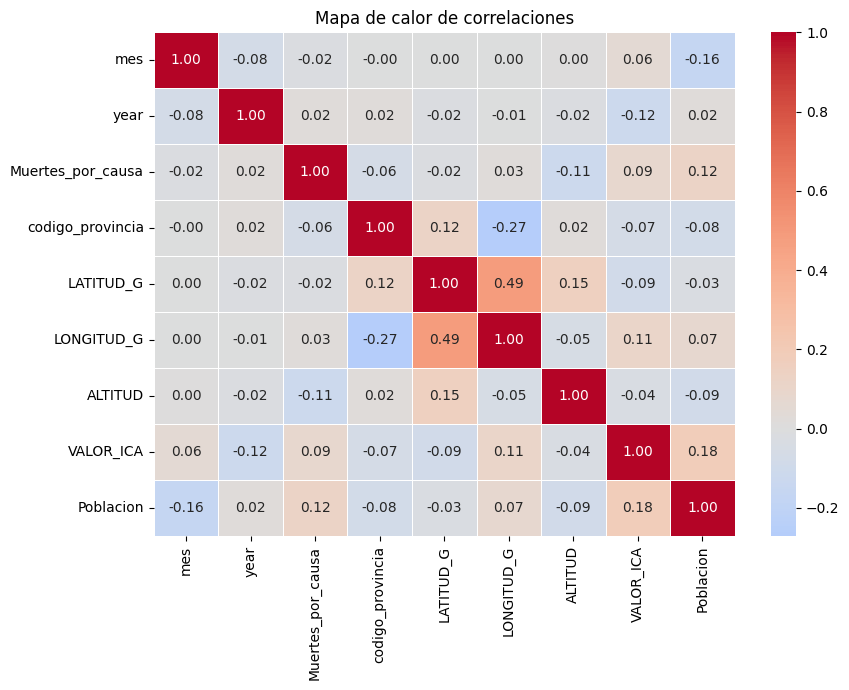

In [16]:
# 1. Columnas categóricas y frecuencias
print("\n🔹 Columnas categóricas:")
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

for col in cat_cols:
    print(f"\n🔹 Frecuencia de valores en '{col}':")
    print(df[col].value_counts())
    

# 2. Correlaciones (solo variables numéricas)
print("\n🔹 Correlación con la variable objetivo (muertes_por_causa):")
correlation = df.corr(numeric_only=True)
correlaciones_ordenadas = correlation["Muertes_por_causa"].sort_values(ascending=False)
print(correlaciones_ordenadas)
print("\nTop 10 correlaciones positivas:")
print(correlaciones_ordenadas.head(10))
print("\nTop 10 correlaciones negativas:")
print(correlaciones_ordenadas.tail(10))


# 3. Mapa de calor de correlaciones
plt.figure(figsize=(9,7))
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

Existe una correlación lineal sutil entre las muertes y el Valor ICA, la población, la altitud y la provincia. Pero aquí solo de pueden ver relaciones lineales, y las mortalidad no necesariamente sigue patrones lineales, por ejemplo valores medios de contaminación durante tiempo prolongado pueden tener efecto diferido y diferente, porque influyen muchas otras variables aqui no recogidas como el clima.

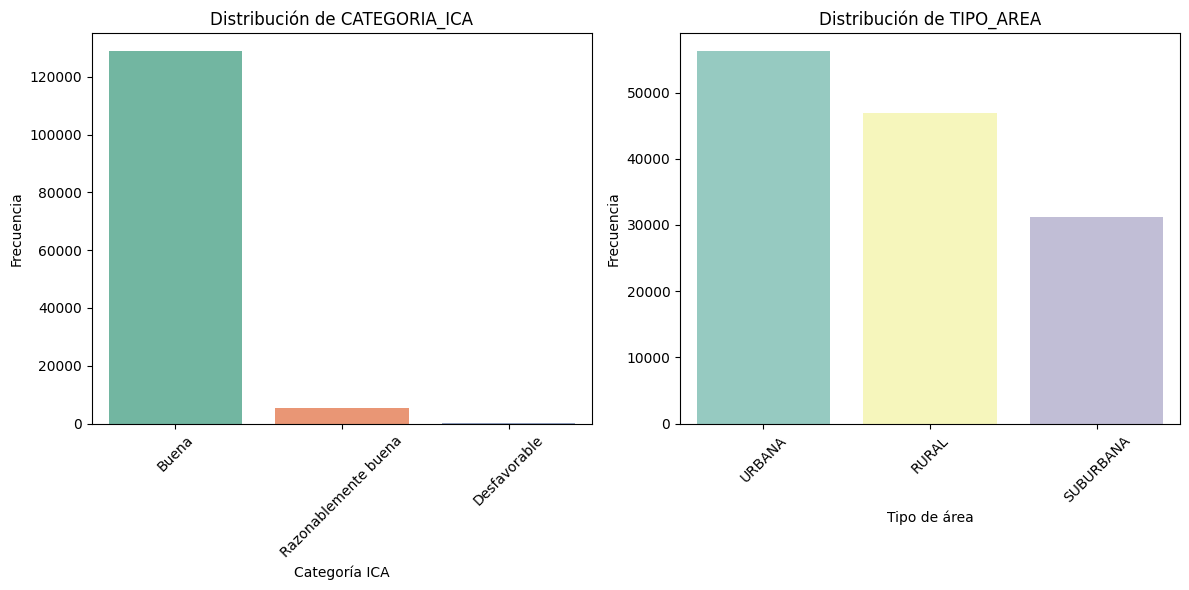

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con 2 subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Conteo de CATEGORIA_ICA
sns.countplot(
    data=df,
    x='CATEGORIA_ICA',
    order=df['CATEGORIA_ICA'].value_counts().index,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('Distribución de CATEGORIA_ICA')
axes[0].set_xlabel('Categoría ICA')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Conteo de TIPO_AREA
sns.countplot(
    data=df,
    x='TIPO_AREA',
    order=df['TIPO_AREA'].value_counts().index,
    palette='Set3',
    ax=axes[1]
)
axes[1].set_title('Distribución de TIPO_AREA')
axes[1].set_xlabel('Tipo de área')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Se aprecian en las graficas en desbalaceo en las clases, categoria ICA y también el tipo de área, probablemente sesgado por no estar normalizado por número de habitantes.

In [18]:
# Tabla cruzada con frecuencias absolutas
tabla_cruzada = pd.crosstab(df['CATEGORIA_ICA'], df['TIPO_AREA'], margins=True)
print("\n🔹 Frecuencia conjunta (CATEGORIA_ICA vs TIPO_AREA):")
print(tabla_cruzada)



🔹 Frecuencia conjunta (CATEGORIA_ICA vs TIPO_AREA):
TIPO_AREA             RURAL  SUBURBANA  URBANA     All
CATEGORIA_ICA                                         
Buena                 46648      27812   54332  128792
Desfavorable              0         68      68     136
Razonablemente buena    272       3264    1802    5338
All                   46920      31144   56202  134266


In [21]:
# Agregar población total por TIPO_AREA
poblacion_area = df.groupby('TIPO_AREA')['Poblacion'].sum()

# Conteo registros cruzados
tabla_cruzada = pd.crosstab(df['CATEGORIA_ICA'], df['TIPO_AREA'])

# Normalizar por población (dividir cada columna por población de esa área)
tabla_normalizada = tabla_cruzada.div(poblacion_area)

print(tabla_normalizada)


TIPO_AREA                    RURAL     SUBURBANA        URBANA
CATEGORIA_ICA                                                 
Buena                 2.036946e-05  6.313821e-06  7.589678e-06
Desfavorable          0.000000e+00  1.543721e-08  9.498972e-09
Razonablemente buena  1.187724e-07  7.409863e-07  2.517227e-07


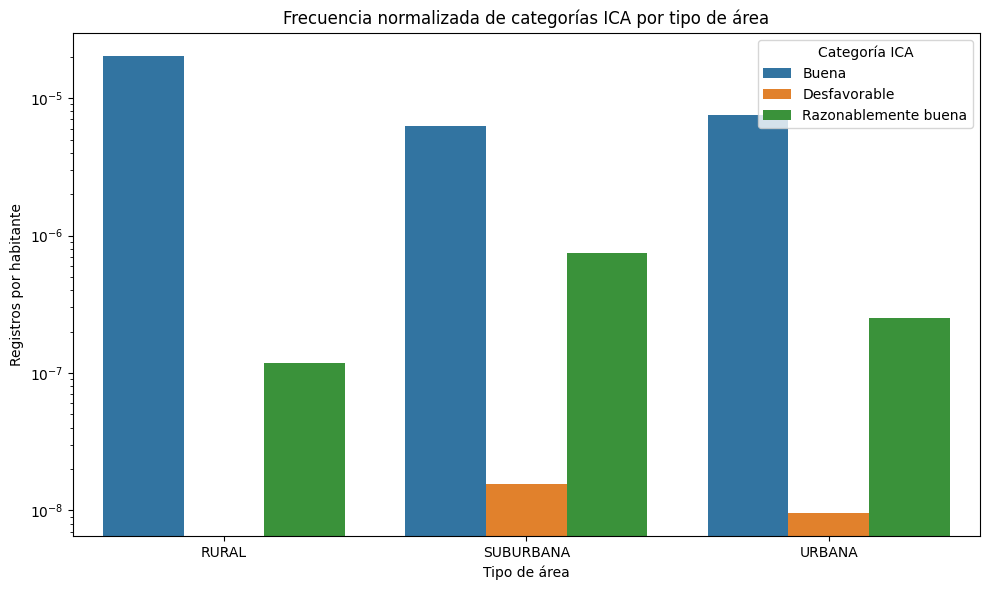

In [22]:
# Suponiendo que tabla_normalizada es tu DataFrame con índices CATEGORIA_ICA y columnas TIPO_AREA

# Transponer para que el eje x sea TIPO_AREA y colores por CATEGORIA_ICA
df_plot = tabla_normalizada.T.reset_index().melt(id_vars='TIPO_AREA', var_name='CATEGORIA_ICA', value_name='Registros_por_habitante')

plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x='TIPO_AREA', y='Registros_por_habitante', hue='CATEGORIA_ICA')

plt.title('Frecuencia normalizada de categorías ICA por tipo de área')
plt.ylabel('Registros por habitante')
plt.xlabel('Tipo de área')
plt.yscale('log')  # Escala logarítmica para ver mejor las diferencias pequeñas
plt.legend(title='Categoría ICA')
plt.tight_layout()
plt.show()


En términos relativos a la población, la categoría "Buena" es mucho más frecuente en las zonas rurales que en urbanas o suburbanas. Esto se traduce en que, por habitante, la calidad del aire "Buena" es más común en el campo. La categoría "Desfavorable" aparece prácticamente solo en zonas suburbanas y urbanas, pero en una frecuencia muy baja por habitante. La categoría "Razonablemente buena" es claramente más frecuente en zonas suburbanas (7.4e-07) que en urbanas (2.5e-07) y mucho más que en rurales (1.2e-07). Esto indica un impacto mayor relativo en la calidad del aire para la población que vive en las áreas suburbanas. Aunque las zonas urbanas tienen muchos registros absolutos, cuando se normaliza por población, las zonas rurales disfrutan mejor calidad del aire per cápita, y las suburbanas tienen el mayor impacto relativo en la calidad “Razonablemente buena” y “Desfavorable”.

Esto confirma que la normalización por población es crucial para evitar confundir mayor cantidad de datos con mayor impacto real.

Las clases ICA están muy desbalanceadas, hay muy pocos datos con ICA elevado. Los valores de contaminación son diarios y por municipio, pero cada municipio tiene un plan de muestreo diferente (cambian los contaminantes) y no está estanadarizado. Para poder conseguir  un dataset con un volumen decente, se siguió la metodología del MITECO (https://www.miteco.gob.es/content/dam/miteco/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/resolucion_02092020_modificacion_ica_tcm30-511596.pdf), en el que describe como mínimo se debe tener alguno de estos contamiantes registrados;  Partículas en suspensión PM2,5, Ozono troposférico (O3 ) o Dióxido de nitrógeno (NO2). Ante la cantidad de valores faltantes, se agruparon los municipios. Eso hace que el promedio sea más neutral, se pierde algo de granularidad, pero la alternativa era imposible de trabajar, a causa de los millones de datos, porque para ver los efectos en la salud se necesitan plazos largos de estudio.

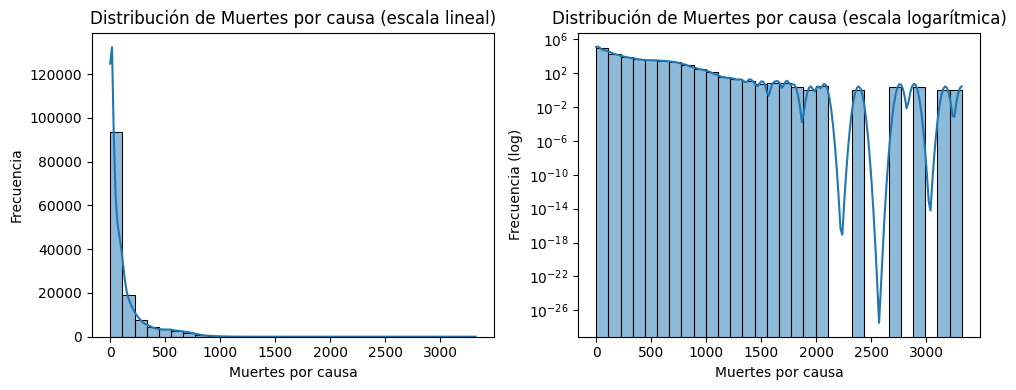

In [23]:
plt.figure(figsize=(10,4))

# Histograma escala lineal
plt.subplot(1, 2, 1)
sns.histplot(df['Muertes_por_causa'], kde=True, bins=30)
plt.title('Distribución de Muertes por causa (escala lineal)')
plt.xlabel('Muertes por causa')
plt.ylabel('Frecuencia')

# Histograma escala logarítmica
plt.subplot(1, 2, 2)
sns.histplot(df['Muertes_por_causa'], kde=True, bins=30)
plt.yscale('log')
plt.title('Distribución de Muertes por causa (escala logarítmica)')
plt.xlabel('Muertes por causa')
plt.ylabel('Frecuencia (log)')

plt.tight_layout()
plt.show()


La media (129.5) es mucho mayor que la mediana(54.46), indicando una distribución sesgada hacia la derecha (unos pocos valores muy altos elevan la media). Además la desviación estándar (208.25) bastante grande en comparación con la media, confirma alta dispersión, siendo ll mínimo es 0 y el máximo es 6345, un rango muy amplio. El 25% de los valores están por debajo de 9.6, y el 75% por debajo de 156.7, lo que indica que la mayoría de los casos tienen valores bajos/moderados.

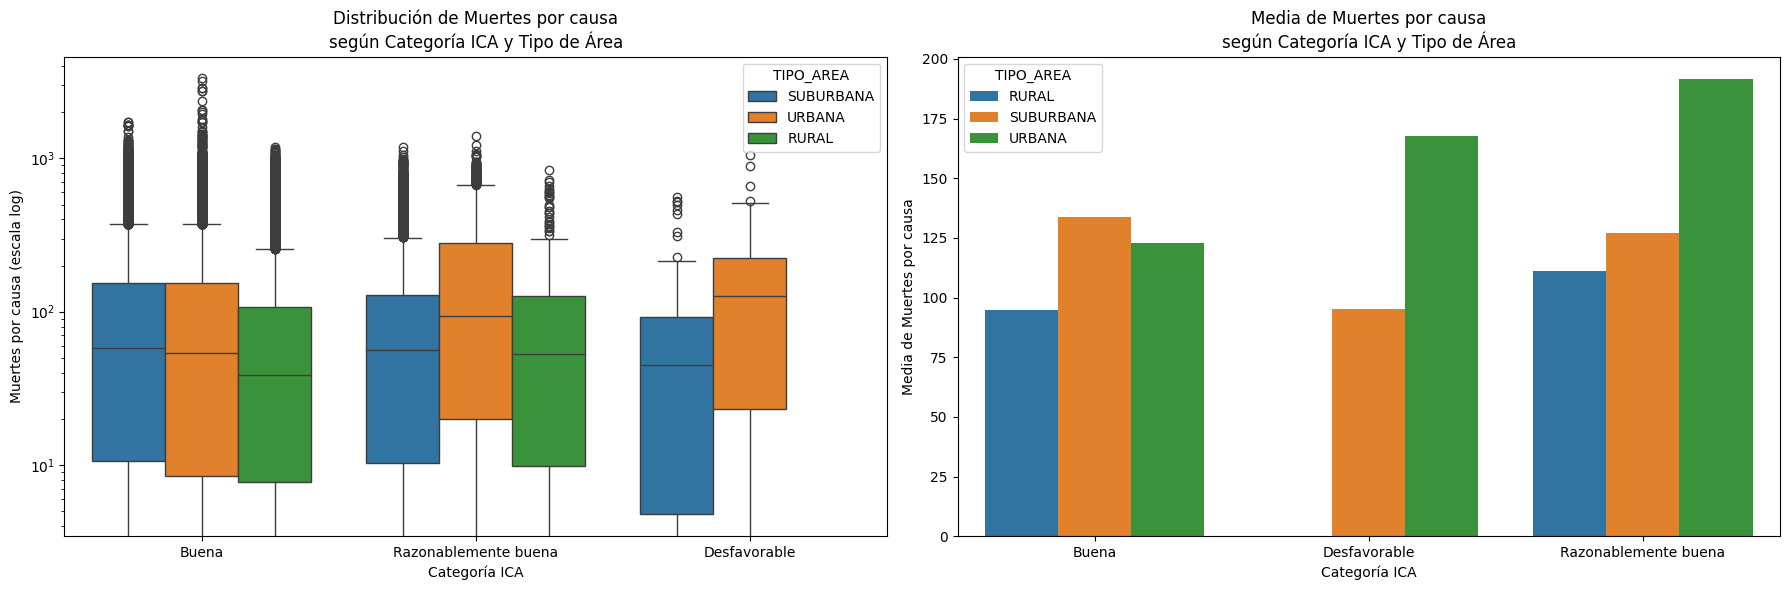

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot con escala log
sns.boxplot(data=df, x='CATEGORIA_ICA', y='Muertes_por_causa', hue='TIPO_AREA', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Distribución de Muertes por causa\nsegún Categoría ICA y Tipo de Área')
axes[0].set_ylabel('Muertes por causa (escala log)')
axes[0].set_xlabel('Categoría ICA')

# Barplot de medias
media_ica_area = df.groupby(['CATEGORIA_ICA', 'TIPO_AREA'])['Muertes_por_causa'].mean().reset_index()
sns.barplot(data=media_ica_area, x='CATEGORIA_ICA', y='Muertes_por_causa', hue='TIPO_AREA', ax=axes[1])
axes[1].set_title('Media de Muertes por causa\nsegún Categoría ICA y Tipo de Área')
axes[1].set_ylabel('Media de Muertes por causa')
axes[1].set_xlabel('Categoría ICA')

plt.tight_layout()
plt.show()


Zonas suburbanas y urbanas con categorías “Razonablemente buena” y “Desfavorable” muestran medias y medianas de muertes más altas que las rurales, especialmente en “URBANA” con categoría “Razonablemente buena” (media ~230 y mediana ~99), la más alta.

Aunque el número de registros en “Desfavorable” es bajo (72 en suburbana y 72 urbana), las muertes promedio son relativamente elevadas, lo cual puede indicar que esas condiciones de ICA malas están asociadas a mortalidad mayor, pero con pocas observaciones.

La categoría “Buena” tiene menor mortalidad promedio, pero sigue mostrando que las áreas suburbanas y urbanas tienen valores mayores que rurales, quizá por mayor densidad poblacional o factores de riesgo diferentes.

In [25]:
# Para corregir la distribucion sesgada, se añade la variable logaritmica
import numpy as np
df['Muertes_log'] = np.log1p(df['Muertes_por_causa'])

In [26]:
frecuencia_ica = df['CATEGORIA_ICA'].value_counts()
print(frecuencia_ica)

CATEGORIA_ICA
Buena                   128792
Razonablemente buena      5338
Desfavorable               136
Name: count, dtype: int64


In [27]:
# para corergir el desbalanceo de clases
bins = [0, 20, 30, np.inf]  
labels = ['Riesgo_ICA_Bajo', 'Riesgo_ICA_Medio', 'Riesgo_ICA_Alto']  # Más claro
df['Riesgo_ICA'] = pd.cut(df['VALOR_ICA'], bins=bins, labels=labels)  

In [28]:
# Calcular muertes normalizadas (por 100k habitantes)
df['Muertes_por_100k'] = (df['Muertes_por_causa'] / df['Poblacion']) * 100000

# Verificar resultados
print(df[['Provincias', 'Poblacion', 'Muertes_por_causa', 'Muertes_por_100k']].head())

       Provincias  Poblacion  Muertes_por_causa  Muertes_por_100k
7898  02 Albacete   199208.0         181.539235         91.130494
7899  02 Albacete    11435.0         130.835010       1144.162746
7900  02 Albacete    10762.0         150.301811       1396.597388
7901  02 Albacete    10089.0         156.187123       1548.093198
7902  02 Albacete     9415.0         155.734406       1654.109468


In [32]:
# Usar SOLO causas específicas (excluir 'Todas las causas')
df = df[df['Causa de muerte'] != '001-102  I-XXII.Todas las causas'].copy()


In [34]:
df = df.rename(columns={
    'Causa de muerte': 'causa_de_muerte',
    'Sexo': 'sexo',
    'Provincias': 'provincias',
    'mes': 'mes',
    'year': 'anio',
    'Muertes_por_causa': 'muertes_por_causa',
    'codigo_provincia': 'codigo_provincia',
    'LATITUD_G': 'latitud_g',
    'LONGITUD_G': 'longitud_g',
    'ALTITUD': 'altitud',
    'TIPO_AREA': 'tipo_area',
    'VALOR_ICA': 'valor_ica',
    'Partido': 'partido',
    'Poblacion': 'poblacion',
    'Muertes_log': 'muertes_log',
    'Categoria_Riesgo_ICA': 'categoria_riesgo_ica',
    'Muertes_por_100k': 'muertes_por_100k',
    'Riesgo_ICA': 'riesgo_ica'
})

In [35]:
df.to_csv('../data/raw/df.csv', sep=';', index=False)

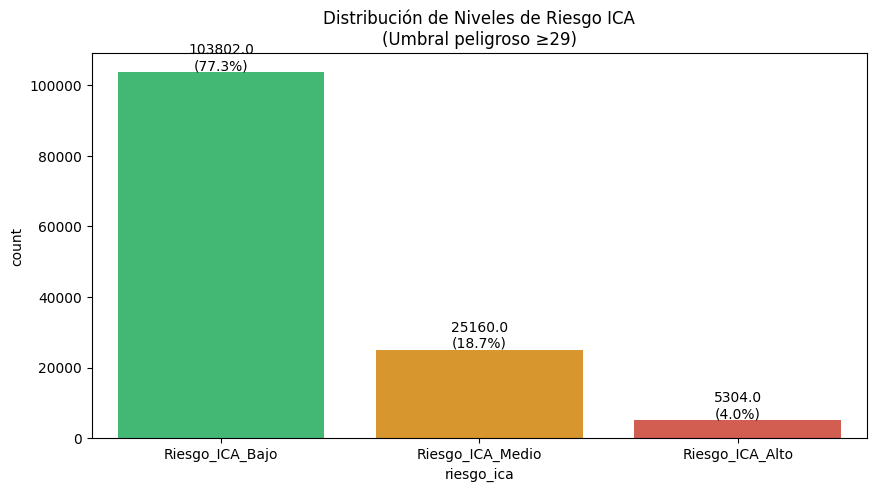

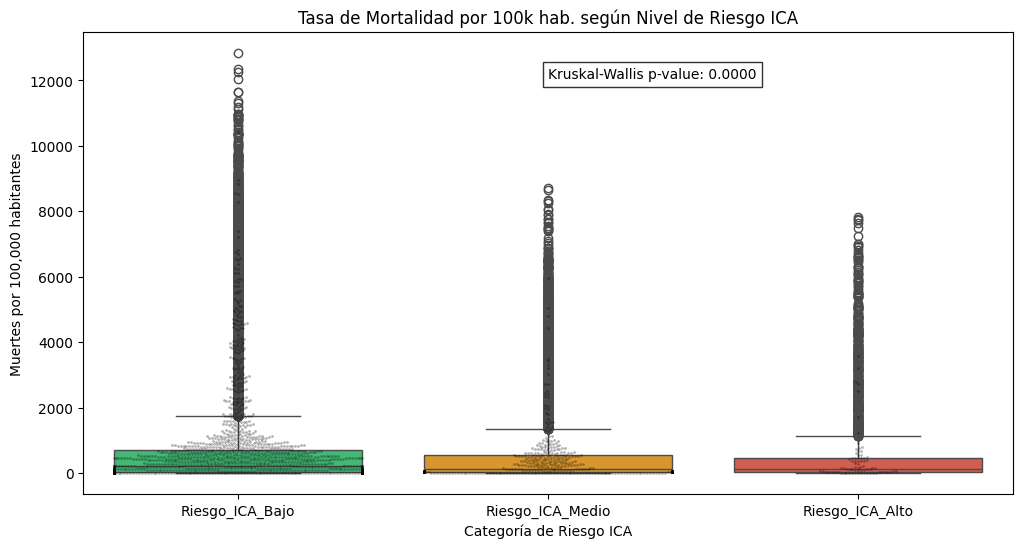

In [36]:
# Muestra solo una muestra aleatoria para el swarmplot si hay muchos datos
sample_df = df.sample(n=2000, random_state=42) if len(df) > 2000 else df

# Gráfico 1: Distribución de categorías de riesgo
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='riesgo_ica', palette=['#2ecc71', '#f39c12', '#e74c3c'])
plt.title("Distribución de Niveles de Riesgo ICA\n(Umbral peligroso ≥29)")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}\n({p.get_height()/len(df):.1%})', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Gráfico 2: Mortalidad vs Riesgo ICA (boxplot + swarmplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='riesgo_ica', y='muertes_por_100k', palette=['#2ecc71', '#f39c12', '#e74c3c'])
sns.swarmplot(data=sample_df, x='riesgo_ica', y='muertes_por_100k', color='black', alpha=0.3, size=2)
plt.title("Tasa de Mortalidad por 100k hab. según Nivel de Riesgo ICA")
plt.xlabel("Categoría de Riesgo ICA")
plt.ylabel("Muertes por 100,000 habitantes")

# Test estadístico (Kruskal-Wallis para comparar grupos)
labels = df['riesgo_ica'].unique()
grupos = [df[df['riesgo_ica'] == cat]['muertes_por_100k'] for cat in labels]
h_stat, p_val = stats.kruskal(*grupos)
plt.text(0.5, 0.9, f'Kruskal-Wallis p-value: {p_val:.4f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

La mayoría de los valores de mortalidad están cerca de cero, pero hay algunos registros con tasas muy altas (outliers).
El test estadístico confirma que la mortalidad varía significativamente según el nivel de riesgo ICA.
Visualmente, puedes comparar la mediana y la dispersión de la mortalidad en cada grupo de riesgo.
En resumen:
La gráfica muestra que la tasa de mortalidad por 100k habitantes cambia según el nivel de riesgo ICA, y esta diferencia es estadísticamente significativa.

In [38]:
import pandas as pd
# 🔹 Agrupar por provincia y calcular la correlación
correlaciones_prov = (
    df.groupby('provincias')
    .apply(lambda g: g['muertes_por_causa'].corr(g['valor_ica']))
    .sort_values(ascending=False)
)

# 🔹 Mostrar resultados
print("Mayor Correlación entre ICA y muertes por provincia:\n")
print(correlaciones_prov)

Mayor Correlación entre ICA y muertes por provincia:

provincias
03 Alicante/Alacant          0.046033
08 Barcelona                 0.043576
45 Toledo                    0.042493
25 Lleida                    0.040155
32 Ourense                   0.040078
13 Ciudad Real               0.031098
21 Huelva                    0.028321
38 Santa Cruz de Tenerife    0.024113
20 Gipuzkoa                  0.023604
44 Teruel                    0.023499
28 Madrid                    0.021356
43 Tarragona                 0.021142
22 Huesca                    0.018638
31 Navarra                   0.014377
27 Lugo                      0.012240
07 Balears, Illes            0.009571
19 Guadalajara               0.001891
09 Burgos                    0.001209
26 Rioja, La                 0.001182
39 Cantabria                 0.000339
49 Zamora                   -0.002014
47 Valladolid               -0.002828
17 Girona                   -0.005342
34 Palencia                 -0.010247
06 Badajoz             

In [39]:
for cat in df['riesgo_ica'].unique():
    print(f"\nCorrelaciones para {cat}:")
    print(df[df['riesgo_ica'] == cat][['muertes_por_100k', 'valor_ica', 'poblacion', 'altitud']].corr())


Correlaciones para Riesgo_ICA_Medio:
                  muertes_por_100k  valor_ica  poblacion   altitud
muertes_por_100k          1.000000  -0.006436  -0.157143  0.115325
valor_ica                -0.006436   1.000000  -0.002382  0.086958
poblacion                -0.157143  -0.002382   1.000000 -0.020391
altitud                   0.115325   0.086958  -0.020391  1.000000

Correlaciones para Riesgo_ICA_Bajo:
                  muertes_por_100k  valor_ica  poblacion   altitud
muertes_por_100k          1.000000  -0.058715  -0.145361  0.106499
valor_ica                -0.058715   1.000000   0.097346 -0.088703
poblacion                -0.145361   0.097346   1.000000 -0.116720
altitud                   0.106499  -0.088703  -0.116720  1.000000

Correlaciones para Riesgo_ICA_Alto:
                  muertes_por_100k  valor_ica  poblacion   altitud
muertes_por_100k          1.000000  -0.033810  -0.178131  0.258221
valor_ica                -0.033810   1.000000   0.142125 -0.286039
poblacion        

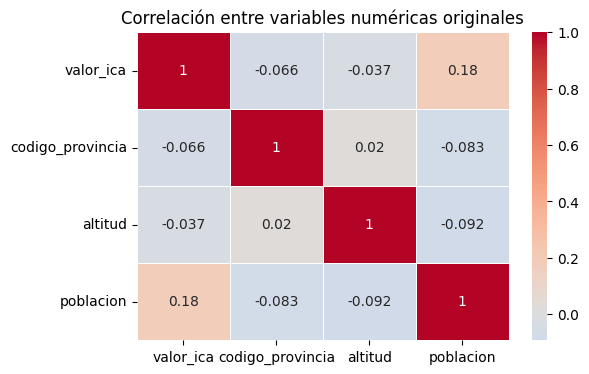

In [40]:
# Solo variables numéricas originales
num_vars = ['valor_ica', 'codigo_provincia', 'altitud', 'poblacion']
corr_matrix = df[num_vars].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlación entre variables numéricas originales")
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Transformar la columna 'partido' en categórica con categorías fijas
partidos = ['PP', 'PSOE', 'PSC', 'PNV', 'CiU', 'UPN', 'DO', 'CC', 'IU']
df['partido'] = pd.Categorical(df['partido'], categories=partidos)

# One-hot encoding directamente en X
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion']]
X = pd.get_dummies(X, columns=['partido'], drop_first=True)

# Crear variable target categórica (baja, media, alta) según muertes_por_100k
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluación en train
y_train_pred = rf.predict(X_train)
print("=== Resultados en TRAIN ===")
print(classification_report(y_train, y_train_pred))
print("Matriz de confusión (train):")
print(confusion_matrix(y_train, y_train_pred))

# Evaluación en test
y_test_pred = rf.predict(X_test)
print("\n=== Resultados en TEST ===")
print(classification_report(y_test, y_test_pred))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_test_pred))

# Probabilidades de cada clase en test (las primeras 5 filas)
probs = rf.predict_proba(X_test)
print("\nProbabilidades de cada clase para las primeras filas del TEST:\n", probs[:5])


=== Resultados en TRAIN ===
              precision    recall  f1-score   support

        alta       0.51      0.73      0.60     33567
        baja       0.76      0.49      0.59     33567
       media       0.50      0.46      0.48     33565

    accuracy                           0.56    100699
   macro avg       0.59      0.56      0.56    100699
weighted avg       0.59      0.56      0.56    100699

Matriz de confusión (train):
[[24401   770  8396]
 [ 9920 16340  7307]
 [13668  4312 15585]]

=== Resultados en TEST ===
              precision    recall  f1-score   support

        alta       0.43      0.60      0.50     11189
        baja       0.70      0.47      0.56     11190
       media       0.36      0.34      0.35     11188

    accuracy                           0.47     33567
   macro avg       0.50      0.47      0.47     33567
weighted avg       0.50      0.47      0.47     33567

Matriz de confusión (test):
[[6686  494 4009]
 [3388 5207 2595]
 [5619 1777 3792]]

Proba

Obtenemos un desempeño muy bajo, por lo que vamos a codificar y normalizar todas categorias y añadir la variable ripo de área

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Definir categorías
tipo_area_cats = ['SUBURBANA', 'URBANA', 'RURAL']
df['tipo_area'] = pd.Categorical(df['tipo_area'], categories=tipo_area_cats)

causas_cats = [
    '001-008  I.Enfermedades infecciosas y parasitarias',
    '009-041  II.Tumores',
    '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
    '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
    '046-049  V.Trastornos mentales y del comportamiento',
    '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
    '053-061 IX.Enfermedades del sistema circulatorio',
    '062-067  X.Enfermedades del sistema respiratorio',
    '068-072  XI.Enfermedades del sistema digestivo',
    '073  XII.Enfermedades de la piel y del tejido subcutáneo',
    '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    '077-080  XIV.Enfermedades del sistema genitourinario',
    '081  XV.Embarazo, parto y puerperio',
    '082  XVI.Afecciones originadas en el periodo perinatal',
    '083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas',
    '086-089  XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    '090-102  XX.Causas externas de mortalidad'
]
df['causa_de_muerte'] = pd.Categorical(df['causa_de_muerte'], categories=causas_cats)

sexo_cats = ['Hombres', 'Mujeres']
df['sexo'] = pd.Categorical(df['sexo'], categories=sexo_cats)

# One-hot encoding
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)

# Target
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("=== Resultados en TRAIN ===")
print(classification_report(y_train, y_pred_train))
print("Matriz de confusión (train):")
print(confusion_matrix(y_train, y_pred_train))

print("\n=== Resultados en TEST ===")
print(classification_report(y_test, y_pred_test))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_pred_test))

# Probabilidades en TEST (primeras 5 filas)
probs = rf.predict_proba(X_test)
print("\nProbabilidades de cada clase para las primeras filas del TEST:")
print(probs[:5])

# Importancia de variables
importancias = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
importancias = importancias.sort_values(by='importance', ascending=False)
print("\nImportancia de variables:")
print(importancias)


=== Resultados en TRAIN ===
              precision    recall  f1-score   support

        alta       1.00      1.00      1.00     33567
        baja       1.00      1.00      1.00     33567
       media       1.00      1.00      1.00     33565

    accuracy                           1.00    100699
   macro avg       1.00      1.00      1.00    100699
weighted avg       1.00      1.00      1.00    100699

Matriz de confusión (train):
[[33566     0     1]
 [    0 33567     0]
 [    0     0 33565]]

=== Resultados en TEST ===
              precision    recall  f1-score   support

        alta       0.89      0.89      0.89     11189
        baja       0.91      0.90      0.90     11190
       media       0.82      0.83      0.82     11188

    accuracy                           0.87     33567
   macro avg       0.87      0.87      0.87     33567
weighted avg       0.87      0.87      0.87     33567

Matriz de confusión (test):
[[ 9996   103  1090]
 [  199 10070   921]
 [  989   952  9247

Vemos la importancia en el modelo de las variables más relevantes; poblacion=0.288327 y valor_ica=0.123224 en la clasificacion de la mortalidad.
Por otro lado, añadiendo variables y categorizando mejor, ha mejorado mucho el desempeño, pero vamos a tratar de mejorar más optmizando parametros y asegurarnos de que no hay overfitting.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Definir categorías
tipo_area_cats = ['SUBURBANA', 'URBANA', 'RURAL']
df['tipo_area'] = pd.Categorical(df['tipo_area'], categories=tipo_area_cats)

causas_cats = [
    '001-008  I.Enfermedades infecciosas y parasitarias',
    '009-041  II.Tumores',
    '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
    '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
    '046-049  V.Trastornos mentales y del comportamiento',
    '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
    '053-061 IX.Enfermedades del sistema circulatorio',
    '062-067  X.Enfermedades del sistema respiratorio',
    '068-072  XI.Enfermedades del sistema digestivo',
    '073  XII.Enfermedades de la piel y del tejido subcutáneo',
    '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    '077-080  XIV.Enfermedades del sistema genitourinario',
    '081  XV.Embarazo, parto y puerperio',
    '082  XVI.Afecciones originadas en el periodo perinatal',
    '083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas',
    '086-089  XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    '090-102  XX.Causas externas de mortalidad'
]
df['causa_de_muerte'] = pd.Categorical(df['causa_de_muerte'], categories=causas_cats)

sexo_cats = ['Hombres', 'Mujeres']
df['sexo'] = pd.Categorical(df['sexo'], categories=sexo_cats)

# One-hot encoding
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)

# Target
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1_macro')

# Entrenar buscando los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar en train
y_pred_train = best_rf.predict(X_train)
print("=== Resultados en TRAIN ===")
print(classification_report(y_train, y_pred_train))
print("Matriz de confusión (train):")
print(confusion_matrix(y_train, y_pred_train))

# Evaluar en test
y_pred_test = best_rf.predict(X_test)
print("\n=== Resultados en TEST ===")
print(classification_report(y_test, y_pred_test))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  25.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

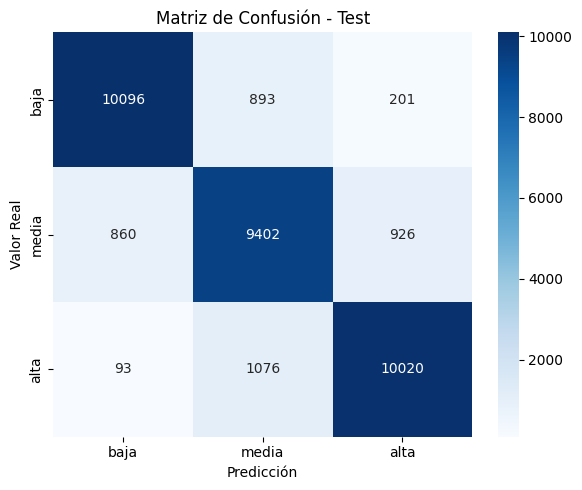

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener matriz de confusión del test
cm = confusion_matrix(y_test, y_pred_test, labels=['baja', 'media', 'alta'])

# Crear mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['baja', 'media', 'alta'], yticklabels=['baja', 'media', 'alta'])

plt.title("Matriz de Confusión - Test")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [47]:
import joblib   # Para guardar el modelo
# Entrenar el mejor modelo con los mejores hiperparámetros

best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)
best_rf.fit(X, y)

# Guarda el modelo entrenado
joblib.dump(best_rf, 'modelo_random_forest_mortalidad.pkl')
print("Modelo guardado como modelo_random_forest_mortalidad.pkl")

Modelo guardado como modelo_random_forest_mortalidad.pkl


Población:  
Correlación lineal baja (0.145), pero altísima importancia en el modelo (0.288. Esto sugiere una relación no lineal o interacciones complejas. Por ejemplo, puede que la población influya más en áreas específicas, o en combinación con otras variables como ALTITUD, TIPO_AREA o ICA.

VALOR_ICA (índice de contaminación):  
Correlación lienal baja (0.123), pero buena importancia en el modelo (0.089). El modelo detecta que la contaminación tiene un **efecto relevante** , aunque no sea lineal ni uniforme en todo el conjunto. La contaminación generada no tiene necesariamente un efecto mortal inmediato, ni siquierea en la geolocalización porque depende de muchos factores climáticos, pero si está claro que tiene un efecto a largo plazo en la mortalidad y, no sólo en enfermedades respiratorias.

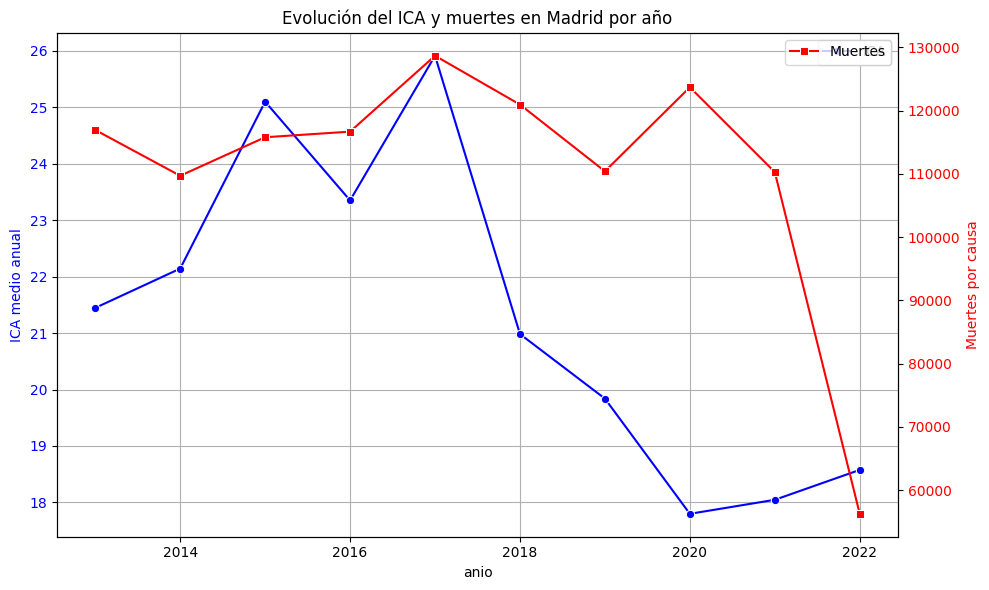

In [48]:

# código de provincia como  string
df['codigo_provincia'] = df['codigo_provincia'].astype(str)

# Filtrar Madrid
df_madrid = df[df['codigo_provincia'] == '28']

# Agrupar
df_madrid_anual = df_madrid.groupby('anio').agg({
    'valor_ica': 'mean',
    'muertes_por_causa': 'sum',
    'partido': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()


# Crear gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# ICA
sns.lineplot(data=df_madrid_anual, x='anio', y='valor_ica', marker='o', ax=ax1, label='ICA', color='blue')
ax1.set_ylabel("ICA medio anual", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Muertes
ax2 = ax1.twinx()
sns.lineplot(data=df_madrid_anual, x='anio', y='muertes_por_causa', marker='s', ax=ax2, label='Muertes', color='red')
ax2.set_ylabel("Muertes por causa", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Evolución del ICA y muertes en Madrid por año")
ax1.grid(True)
plt.tight_layout()
plt.show()


Vamos a hacer una rapida comparación de resultados, teniendo en cuenta el efecto del COVID, cogiendo datos del 2013 hasta el 2019, que como se puede ver en la grafica superior y en la de inicio es donde se disparan las muertes.

In [52]:
import os
print(os.listdir("../data/raw"))

['df_full_completo_filtrado_normalizado.csv', 'df.csv']


In [55]:
import pandas as pd

df_covid = pd.read_csv("../data/raw/df_full_completo_filtrado_normalizado.csv", sep=';')
df_covid.head()

,Causa de muerte,Sexo,Provincias,mes,year,Muertes_por_causa,codigo_provincia,LATITUD_G,LONGITUD_G,ALTITUD,TIPO_AREA,VALOR_ICA,CATEGORIA_ICA,Partido,Poblacion,Muertes_log,Riesgo_ICA,Muertes_por_100k
0,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,1,2022,181.539235,2,38.9808,-1.8452,691.0,SUBURBANA,22.778847,Buena,PP,199208.0,5.206965,Riesgo_ICA_Medio,91.130494
1,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,2,2022,130.835010,2,38.9808,-1.8452,691.0,SUBURBANA,20.110090,Razonablemente buena,PP,11435.0,4.881551,Riesgo_ICA_Medio,1144.162746
2,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,3,2022,150.301811,2,38.9808,-1.8452,691.0,SUBURBANA,26.769706,Buena,PP,10762.0,5.019277,Riesgo_ICA_Medio,1396.597388
3,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,4,2022,156.187123,2,38.9808,-1.8452,691.0,SUBURBANA,8.073927,Buena,PP,10089.0,5.057437,Riesgo_ICA_Bajo,1548.093198
4,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,5,2022,155.734406,2,38.9808,-1.8452,691.0,SUBURBANA,13.674748,Buena,PP,9415.0,5.054553,Riesgo_ICA_Bajo,1654.109468


In [56]:
df_covid=df[df['anio'] <= 2019]

In [57]:
df_covid['anio'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013])

In [59]:
df.shape

(134266, 19)

In [60]:
# Definir categorías
tipo_area_cats = ['SUBURBANA', 'URBANA', 'RURAL']
df_covid['tipo_area'] = pd.Categorical(df_covid['tipo_area'], categories=tipo_area_cats)

causas_cats = [
    '001-008  I.Enfermedades infecciosas y parasitarias',
    '009-041  II.Tumores',
    '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
    '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
    '046-049  V.Trastornos mentales y del comportamiento',
    '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
    '053-061 IX.Enfermedades del sistema circulatorio',
    '062-067  X.Enfermedades del sistema respiratorio',
    '068-072  XI.Enfermedades del sistema digestivo',
    '073  XII.Enfermedades de la piel y del tejido subcutáneo',
    '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    '077-080  XIV.Enfermedades del sistema genitourinario',
    '081  XV.Embarazo, parto y puerperio',
    '082  XVI.Afecciones originadas en el periodo perinatal',
    '083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas',
    '086-089  XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    '090-102  XX.Causas externas de mortalidad'
]
df_covid['causa_de_muerte'] = pd.Categorical(df_covid['causa_de_muerte'], categories=causas_cats)

sexo_cats = ['Hombres', 'Mujeres']
df_covid['sexo'] = pd.Categorical(df_covid['sexo'], categories=sexo_cats)

# One-hot encoding
X = df_covid[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)

# Target
df_covid['clase_mortalidad'] = pd.qcut(df_covid['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df_covid['clase_mortalidad']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1_macro')

# Entrenar buscando los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar en train
y_pred_train = best_rf.predict(X_train)
print("=== Resultados en TRAIN ===")
print(classification_report(y_train, y_pred_train))
print("Matriz de confusión (train):")
print(confusion_matrix(y_train, y_pred_train))

# Evaluar en test
y_pred_test = best_rf.predict(X_test)
print("\n=== Resultados en TEST ===")
print(classification_report(y_test, y_pred_test))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

El Modelo pre_covid (con datos hasta 2019) es mejor; tiene mejor rendimiento general en test (accuracy y f1-score), tiene menos overfitting (train/test más equilibrado) y es   más robusto, especialmente en la clase “media”, la más difícil de clasificar.

In [62]:
import os
import joblib

# Crear carpeta models si no existe (ruta relativa desde notebooks)
os.makedirs('../models', exist_ok=True)

# Guardar modelo entrenado
joblib.dump(best_rf, '../models/rf_pre_covid.pkl')
print("Modelo guardado en '../models/rf_pre_covid.pkl'")

# Guardar lista de columnas usadas en entrenamiento
columnas_modelo = X_train.columns.tolist()
joblib.dump(columnas_modelo, '../models/columnas_modelo.pkl')
print(f"Lista de columnas guardada en '../models/columnas_modelo.pkl' con {len(columnas_modelo)} columnas")


Modelo guardado en '../models/rf_pre_covid.pkl'
Lista de columnas guardada en '../models/columnas_modelo.pkl' con 31 columnas
